### Exercises

**Q2**: Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

Note: You can use the shift() function from the scipy.ndimage.interpolation module. For example, shift(image, [2, 1], cval=0) shifts the image 2 pixels down and 1 pixel to the right.

**A2**:

In [10]:
# get the data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./tmp')

In [11]:
X, y = mnist["data"], mnist["target"]
print(mnist.DESCR)
print(X.shape)
print(y.shape)

mldata.org dataset: mnist-original
(70000, 784)
(70000,)


In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

import numpy as np

In [13]:
def translate_image(x, translation):
    return shift(np.reshape(x, (28,28)),translation).flatten()

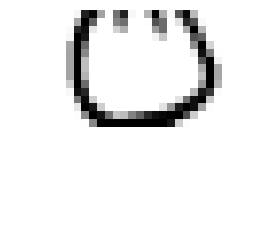

In [14]:
from scipy.ndimage.interpolation import shift
#showing how the shift function works on an image:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
    
image = shift(np.reshape(X_train[1000], (28,28)),[-10,0])
plt.imshow(image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
X_train_expanded = []
X_train_expanded.extend(X_train)

translations = [
    [1,0],
#     [0,1],
#     [-1, 0],
#     [0, -1]
]

for translation in translations:
    result = np.empty(X_train.shape, dtype='uint8')
    for i in range(len(result)):
        result[i] = translate_image(X_train[i],translation)
    X_train_expanded.extend(result)

X_train_expanded = np.array(X_train_expanded)

y_train_expanded = []
for i in range(2):
    y_train_expanded.extend(y_train)

y_train_expanded = np.array(y_train_expanded)

In [16]:
shuffle_index = np.random.permutation(X_train_expanded.shape[0])
X_train_expanded, y_train_expanded = X_train_expanded[shuffle_index], y_train_expanded[shuffle_index]

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# avoidoing parallelism as this seems to use a ton of memory
best_knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
scores = cross_val_score(best_knn_clf, X_train_expanded, y_train_expanded, cv=3, verbose=3)

[CV]  ................................................................
[CV] ................................. , score=0.980126, total=72.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 72.4min remaining:    0.0s


[CV] ................................. , score=0.980350, total=90.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 162.7min remaining:    0.0s


[CV] ................................. , score=0.980723, total=74.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 237.4min finished


In [19]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.980 (+/- 0.000)


Managed to get this up to 98%, with only adding one shift. It seems to take exponentially longer to fit as the size of training set increases. This was 120,000 samples and it took a few hours. It'd be interesting to profile the time it takes as a function of training size.

### Exercises cont.

Solutions continued [here](exercises_3.ipynb).